<a href="https://colab.research.google.com/github/ShashankDhulipala/EOD/blob/main/Customer%20segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [297]:
import pandas as pd
import numpy as np

In [298]:
df=pd.read_csv("/content/drive/MyDrive/dataset/Mall_Customers.csv")

In [299]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [154]:
df.Gender[df.Gender == 'Male'] = 1
df.Gender[df.Gender == 'Female'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans



In [156]:
px.bar(df,x="Age",y="Annual Income (k$)",color="Gender")

Text(0, 0.5, 'Annual Income (k$)')

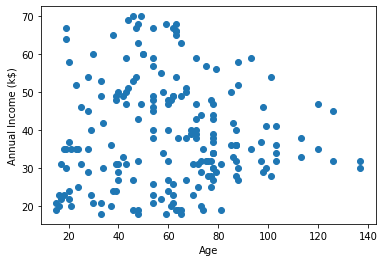

In [161]:
plt.scatter(df['Annual Income (k$)'],df['Age'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')


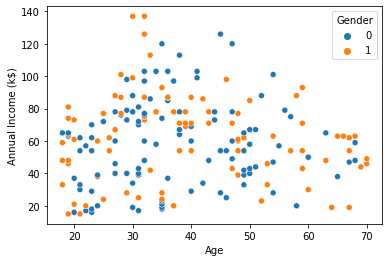

In [163]:
sns.scatterplot(x="Age",y="Annual Income (k$)",hue="Gender",data=df)

In [249]:
km=KMeans(n_clusters=3)
y_pred=km.fit_predict(df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender']])

In [250]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [251]:
df['cluster']=y_pred

In [252]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,SAge,Sincome,Sspending,clsuter1,SGender
0,1,1,19,15,39,0,0.019231,0.000000,0.387755,2,1.0
1,2,1,21,15,81,0,0.057692,0.000000,0.816327,2,1.0
2,3,0,20,16,6,0,0.038462,0.008197,0.051020,1,0.0
3,4,0,23,16,77,0,0.096154,0.008197,0.775510,1,0.0
4,5,0,31,17,40,0,0.250000,0.016393,0.397959,1,0.0


In [253]:
km.cluster_centers_

array([[40.32520325, 44.15447154, 49.82926829,  0.40650407],
       [40.39473684, 87.        , 18.63157895,  0.52631579],
       [32.69230769, 86.53846154, 82.12820513,  0.46153846]])

In [267]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]



In [268]:
km.cluster_centers_

array([[40.32520325, 44.15447154, 49.82926829,  0.40650407],
       [40.39473684, 87.        , 18.63157895,  0.52631579],
       [32.69230769, 86.53846154, 82.12820513,  0.46153846]])

In [269]:
km.cluster_centers_[:,0]

array([40.32520325, 40.39473684, 32.69230769])

In [270]:
km.cluster_centers_[:,1]



array([44.15447154, 87.        , 86.53846154])

In [271]:
km.cluster_centers_[:,2]

array([49.82926829, 18.63157895, 82.12820513])

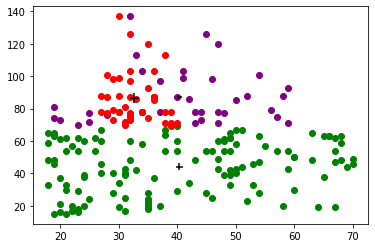

In [272]:
plt.scatter(df1['Age'],df1['Annual Income (k$)'],color='green')
plt.scatter(df2['Age'],df2['Annual Income (k$)'],color='purple')
plt.scatter(df3['Age'],df3['Annual Income (k$)'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],km.cluster_centers_[:,2],color='black',marker='+')

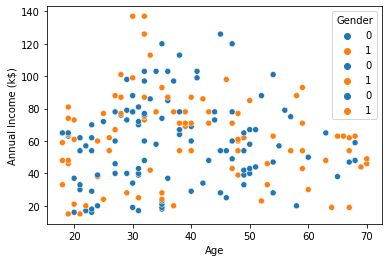

In [273]:
sns.scatterplot(x="Age",y="Annual Income (k$)",hue="Gender",data=df1)
sns.scatterplot(x="Age",y="Annual Income (k$)",hue="Gender",data=df2)
sns.scatterplot(x="Age",y="Annual Income (k$)",hue="Gender",data=df3)







In [274]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,SAge,Sincome,Sspending,clsuter1,SGender
0,1,1,19,15,39,0,0.019231,0.000000,0.387755,2,1.0
1,2,1,21,15,81,0,0.057692,0.000000,0.816327,2,1.0
2,3,0,20,16,6,0,0.038462,0.008197,0.051020,1,0.0
3,4,0,23,16,77,0,0.096154,0.008197,0.775510,1,0.0
4,5,0,31,17,40,0,0.250000,0.016393,0.397959,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
195,196,0,35,120,79,2,0.326923,0.860656,0.795918,1,0.0
196,197,0,45,126,28,1,0.519231,0.909836,0.275510,1,0.0
197,198,1,32,126,74,2,0.269231,0.909836,0.744898,2,1.0
198,199,1,32,137,18,1,0.269231,1.000000,0.173469,0,1.0


In [275]:
from sklearn.preprocessing import MinMaxScaler

In [276]:
scaler=MinMaxScaler()

In [277]:
scaler.fit(df[['Age']])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [278]:
df["SAge"]=scaler.transform(df[["Age"]])

In [279]:
scaler.fit(df[["Annual Income (k$)"]])
df["Sincome"]=scaler.transform(df[["Annual Income (k$)"]])

In [280]:
scaler.fit(df[['Spending Score (1-100)']])
df["Sspending"]=scaler.transform(df[["Spending Score (1-100)"]])

In [281]:
scaler.fit(df[['Gender']])
df["SGender"]=scaler.transform(df[["Gender"]])

In [282]:
km2=KMeans(n_clusters=3)
km2.fit(df[['SAge','Sincome','Sspending','SGender']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [283]:
df['clsuter1']=km2.predict(df[['SAge','Sincome','Sspending','SGender']])

In [284]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,SAge,Sincome,Sspending,clsuter1,SGender
0,1,1,19,15,39,0,0.019231,0.000000,0.387755,2,1.0
1,2,1,21,15,81,0,0.057692,0.000000,0.816327,2,1.0
2,3,0,20,16,6,0,0.038462,0.008197,0.051020,0,0.0
3,4,0,23,16,77,0,0.096154,0.008197,0.775510,0,0.0
4,5,0,31,17,40,0,0.250000,0.016393,0.397959,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
195,196,0,35,120,79,2,0.326923,0.860656,0.795918,0,0.0
196,197,0,45,126,28,1,0.519231,0.909836,0.275510,0,0.0
197,198,1,32,126,74,2,0.269231,0.909836,0.744898,2,1.0
198,199,1,32,137,18,1,0.269231,1.000000,0.173469,1,1.0


In [285]:
km2.cluster_centers_

array([[3.86504121e-01, 3.62704918e-01, 5.15579446e-01, 4.44089210e-16],
       [6.04567308e-01, 3.88661202e-01, 2.87840136e-01, 1.00000000e+00],
       [1.97115385e-01, 3.85245902e-01, 7.21173469e-01, 1.00000000e+00]])

In [287]:
df6=df[df.cluster==0]
df7=df[df.cluster==1]
df8=df[df.cluster==2]




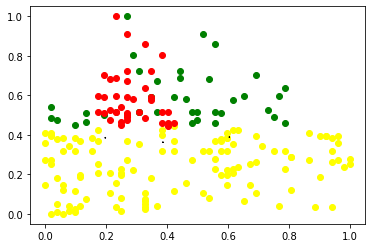

In [296]:
plt.scatter(df6['SAge'],df6['Sincome'],color='yellow')
plt.scatter(df7['SAge'],df7['Sincome'],color='green')
plt.scatter(df8['SAge'],df8['Sincome'],color='red')
plt.scatter(km2.cluster_centers_[:,0],km2.cluster_centers_[:,1],km2.cluster_centers_[:,2],color='black',label='centroid',marker='*')

In [289]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'cluster', 'SAge', 'Sincome', 'Sspending',
       'clsuter1', 'SGender'],
      dtype='object')

In [290]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km3 = KMeans(n_clusters=k)
    km.fit(df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender']])
    sse.append(km.inertia_)

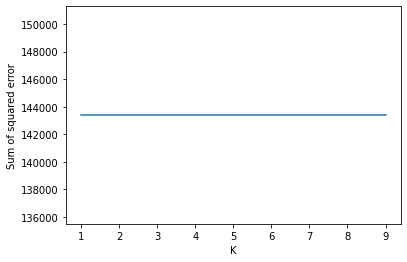

In [291]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [200]:
sse

[75399.61541401483,
 75399.61541401483,
 75399.61541401483,
 75399.61541401483,
 75528.58656469136,
 75399.61541401483,
 75542.77371510217,
 75528.58656469136,
 75399.61541401483]